In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

In [2]:
#Read excel file
dfs = pd.read_excel('./logs_regression.xlsx')
#dfs = pd.read_excel('./lambda_sweep_06_March_2018.xlsx')
dfs.head()

tmp = dfs.columns.values
tmp[1] = 'data'
dfs.columns = tmp

dfs


,Date,data,hidden,dim,num_classes,loss,lr_init,coeff,coeff_lambda,algorithm,...,CCR1_test,last_iter,ccr_tr_last,ccr_test_last,rmse_tr_last,rmse_test_last,mae_tr.1,mae_test.1,CCR1_tr.1,CCR1_test.1
0,March15 16:45:11,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,1.0,weighted_softmax,...,0.706321,100,0.361167,0.357550,1.821098,1.834696,1.185494,1.193152,0.707632,0.706321
1,March15 16:47:08,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,1.0,weighted_softmax,...,0.700834,100,0.358479,0.353161,1.786255,1.840489,1.170626,1.204785,0.710100,0.702371
2,March15 16:48:59,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,1.0,weighted_softmax,...,0.708077,100,0.358369,0.357331,1.809735,1.847275,1.182641,1.198639,0.707138,0.708955
3,March15 16:50:55,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,1.0,weighted_softmax,...,0.693371,100,0.366270,0.344601,1.780733,1.887124,1.158501,1.235075,0.711966,0.696005
4,March15 16:52:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,mae,1.0,weighted_softmax,...,0.665277,100,0.361332,0.351185,1.794681,1.890842,1.174576,1.235514,0.707083,0.691835
5,March15 16:54:55,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,mae,1.0,weighted_softmax,...,0.699517,100,0.358095,0.359965,1.808295,1.827024,1.181928,1.187884,0.707686,0.707858
6,March15 16:56:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,mae,1.0,weighted_softmax,...,0.704565,100,0.357766,0.347015,1.810417,1.847690,1.185220,1.212906,0.706315,0.705443
7,March15 16:58:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,mae,1.0,weighted_softmax,...,0.706321,100,0.362155,0.353161,1.799215,1.853443,1.172766,1.203907,0.708729,0.709175
8,March15 17:00:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,mae,1.0,weighted_softmax,...,0.693371,100,0.362978,0.343942,1.793320,1.880658,1.173973,1.234855,0.703956,0.693810
9,March15 17:02:49,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,mae,1.0,weighted_softmax,...,0.679543,100,0.360180,0.350088,1.774437,1.891713,1.162342,1.234416,0.711911,0.695127


In [4]:
# map weights and losses
map_loss = {'1.0xsingle + 0.0Xmulti': 'SL', '0.0xsingle + 1.0Xmulti': 'ML', 'SL':'SL', 'ML':'ML'}
map_coeff = {'[1]':'CCR','[1, 1, 1]':'CCR1',
              '[ 0.11111111  0.22222222  0.33333333  0.44444444  0.55555556  0.66666667\n  0.77777778  0.88888889  1.          0.88888889  0.77777778  0.66666667\n  0.55555556  0.44444444  0.33333333  0.22222222  0.11111111]':'MAE',
            '[ 0.20987654  0.39506173  0.55555556  0.69135802  0.80246914  0.88888889\n  0.95061728  0.98765432  1.          0.98765432  0.95061728  0.88888889\n  0.80246914  0.69135802  0.55555556  0.39506173  0.20987654]':'MSE',
            'ccr1':'CCR1', 'ccr':'CCR', 'mae':'MAE', 'mse': 'MSE'}
#dfs.loss = [map_loss[x] for x in dfs.loss.values]
dfs.coeff = [map_coeff[x] for x in dfs.coeff.values]

dfs.head()

,Date,data,hidden,dim,num_classes,loss,lr_init,coeff,coeff_lambda,algorithm,...,CCR1_test,last_iter,ccr_tr_last,ccr_test_last,rmse_tr_last,rmse_test_last,mae_tr.1,mae_test.1,CCR1_tr.1,CCR1_test.1
0,March15 16:45:11,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.706321,100,0.361167,0.357550,1.821098,1.834696,1.185494,1.193152,0.707632,0.706321
1,March15 16:47:08,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.700834,100,0.358479,0.353161,1.786255,1.840489,1.170626,1.204785,0.710100,0.702371
2,March15 16:48:59,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.708077,100,0.358369,0.357331,1.809735,1.847275,1.182641,1.198639,0.707138,0.708955
3,March15 16:50:55,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.693371,100,0.366270,0.344601,1.780733,1.887124,1.158501,1.235075,0.711966,0.696005
4,March15 16:52:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.665277,100,0.361332,0.351185,1.794681,1.890842,1.174576,1.235514,0.707083,0.691835


In [18]:
'''If algorithm is one of the benchmarks then there is no coeffs and loss'''
dfs_test_ = dfs.copy()

coeffs = []
loss = []
idxs = []
coeffs_lambda = []
for index, row in dfs_test_.iterrows():
    coeffs_lambda.append(1-np.round(float(row['loss'].split('x')[0]), decimals=1))
    if(str(row['algorithm']) == ('learn_a') or row['algorithm'] == ('fix_a')
       or row['algorithm'] == ('cheng') or row['algorithm'] == ('poisson')
       or row['algorithm'] == ('binomial')
      or row['algorithm'] == ('fix_a_mae') or row['algorithm'] == ('learn_a_mae')):
        coeff_val = 'None'
        loss_val = 'None'
        idxs.append(index)
    else:
        coeff_val = row['coeff']
        loss_val = row['loss']  
    coeffs.append(coeff_val)
    loss.append(loss_val)
    
dfs_test_.coeff = coeffs
dfs_test_.loss = loss
dfs_test_.coeff_lambda = coeffs_lambda


dfs_test_

,Date,data,hidden,dim,num_classes,loss,lr_init,coeff,coeff_lambda,algorithm,...,CCR1_test,last_iter,ccr_tr_last,ccr_test_last,rmse_tr_last,rmse_test_last,mae_tr.1,mae_test.1,CCR1_tr.1,CCR1_test.1
0,March15 16:45:11,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,0.0,weighted_softmax,...,0.706321,100,0.361167,0.357550,1.821098,1.834696,1.185494,1.193152,0.707632,0.706321
1,March15 16:47:08,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,0.0,weighted_softmax,...,0.700834,100,0.358479,0.353161,1.786255,1.840489,1.170626,1.204785,0.710100,0.702371
2,March15 16:48:59,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,0.0,weighted_softmax,...,0.708077,100,0.358369,0.357331,1.809735,1.847275,1.182641,1.198639,0.707138,0.708955
3,March15 16:50:55,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,0.0,weighted_softmax,...,0.693371,100,0.366270,0.344601,1.780733,1.887124,1.158501,1.235075,0.711966,0.696005
4,March15 16:52:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,0.0,weighted_softmax,...,0.665277,100,0.361332,0.351185,1.794681,1.890842,1.174576,1.235514,0.707083,0.691835
5,March15 16:54:55,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,0.1,weighted_softmax,...,0.699517,100,0.358095,0.359965,1.808295,1.827024,1.181928,1.187884,0.707686,0.707858
6,March15 16:56:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,0.1,weighted_softmax,...,0.704565,100,0.357766,0.347015,1.810417,1.847690,1.185220,1.212906,0.706315,0.705443
7,March15 16:58:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,0.1,weighted_softmax,...,0.706321,100,0.362155,0.353161,1.799215,1.853443,1.172766,1.203907,0.708729,0.709175
8,March15 17:00:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,0.1,weighted_softmax,...,0.693371,100,0.362978,0.343942,1.793320,1.880658,1.173973,1.234855,0.703956,0.693810
9,March15 17:02:49,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,0.1,weighted_softmax,...,0.679543,100,0.360180,0.350088,1.774437,1.891713,1.162342,1.234416,0.711911,0.695127


In [17]:
'''If algorithm is one of the benchmarks then there is no coeffs and loss'''
dfs_test_ = dfs.copy()

coeffs_lambda = []
loss = []
idxs = []
for index, row in dfs_test_.iterrows():
    if(row['coeff_lambda']==-1):
        if(str(row['coeff']) == ('CCR')):
           coeffs_lambda.append(0)
        else:
           coeffs_lambda.append(1)
    else:
           coeffs_lambda.append(row['coeff_lambda'])
           
dfs_test_.coeff_lambda = coeffs_lambda
dfs_test_

,Date,data,hidden,dim,num_classes,loss,lr_init,coeff,coeff_lambda,algorithm,...,CCR1_test,last_iter,ccr_tr_last,ccr_test_last,rmse_tr_last,rmse_test_last,mae_tr.1,mae_test.1,CCR1_tr.1,CCR1_test.1
0,March15 16:45:11,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.706321,100,0.361167,0.357550,1.821098,1.834696,1.185494,1.193152,0.707632,0.706321
1,March15 16:47:08,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.700834,100,0.358479,0.353161,1.786255,1.840489,1.170626,1.204785,0.710100,0.702371
2,March15 16:48:59,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.708077,100,0.358369,0.357331,1.809735,1.847275,1.182641,1.198639,0.707138,0.708955
3,March15 16:50:55,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.693371,100,0.366270,0.344601,1.780733,1.887124,1.158501,1.235075,0.711966,0.696005
4,March15 16:52:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,1.0xsingle + 0.0Xmulti,1,MAE,1.0,weighted_softmax,...,0.665277,100,0.361332,0.351185,1.794681,1.890842,1.174576,1.235514,0.707083,0.691835
5,March15 16:54:55,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,1.0,weighted_softmax,...,0.699517,100,0.358095,0.359965,1.808295,1.827024,1.181928,1.187884,0.707686,0.707858
6,March15 16:56:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,1.0,weighted_softmax,...,0.704565,100,0.357766,0.347015,1.810417,1.847690,1.185220,1.212906,0.706315,0.705443
7,March15 16:58:56,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,1.0,weighted_softmax,...,0.706321,100,0.362155,0.353161,1.799215,1.853443,1.172766,1.203907,0.708729,0.709175
8,March15 17:00:54,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,1.0,weighted_softmax,...,0.693371,100,0.362978,0.343942,1.793320,1.880658,1.173973,1.234855,0.703956,0.693810
9,March15 17:02:49,house_16H,"[64, 64, 128, 128, 256, 512, 256, 128, 64, 32,...",16,10,0.9xsingle + 0.1Xmulti,1,MAE,1.0,weighted_softmax,...,0.679543,100,0.360180,0.350088,1.774437,1.891713,1.162342,1.234416,0.711911,0.695127


In [21]:
# Drop the unnecessary colums

dfs_test = dfs_test_.drop(['Date',  'hidden', 'dim' , 'num_classes', 
                      'Number of iter', 'loss_tr', 'loss_test', 'CCR_tr', 'CCR_test',
                      'rmse_tr', 'rmse_test', 'mae_tr', 'mae_test', 'CCR1_tr', 'CCR1_test',
                      'last_iter', 'CCR1_tr.1', 'ccr_tr_last', 'mae_tr.1', 'rmse_tr_last',
                          'loss'], axis=1)


#dfs_simple.head()

#dfs_test = dfs_simple.drop(dfs_simple.columns[3:15], axis=1)

dfs_benchmark = pd.DataFrame({'data':['call_housing', 'call_housing', 'boston_housing', 'boston_housing',
                                      'cpu_act', 'cpu_act', 'house_16h', 'house_16h'],
                              #'loss':['Benchmark' for k in range(8)],
                              'coeff':['None' for k in range(8)],
                             'ccr_test_last':[.281, .304, .394, .458, .372, .473, .187, .251],
                            'mae_test.1':[1.40, 1.23, 2.87, .54, 1.05, .74, 2., 1.50],
                              'algorithm':['NN', 'Best', 'NN', 'Best', 'NN', 'Best', 'NN', 'Best']
                         })

dfs_test_w_benchmark = dfs_test.append(dfs_benchmark)

map_data = {'house_16h': 'house_16h (census10\' - CEE10)', 'house_16H': 'house_16h (census10\' - CEE10)',
            'cpu_act':'cpu_act (computer10\' - CC10)',
            'boston_housing':'boston_housing (H10)', 'call_housing': 'call_housing (CH10)','cal_housing': 'call_housing (CH10)'}
dfs_test.data = [map_data[x] for x in dfs_test.data.values]
dfs_test_w_benchmark.data = [map_data[x] for x in dfs_test_w_benchmark.data.values]

dfs_test_NN = dfs_test.drop(idxs)
dfs_test_w_benchmark

,CCR1_test.1,algorithm,ccr_test_last,coeff,coeff_lambda,data,lr_init,mae_test.1,rmse_test_last
0,0.706321,weighted_softmax,0.357550,MAE,0.0,house_16h (census10' - CEE10),1.0,1.193152,1.834696
1,0.702371,weighted_softmax,0.353161,MAE,0.0,house_16h (census10' - CEE10),1.0,1.204785,1.840489
2,0.708955,weighted_softmax,0.357331,MAE,0.0,house_16h (census10' - CEE10),1.0,1.198639,1.847275
3,0.696005,weighted_softmax,0.344601,MAE,0.0,house_16h (census10' - CEE10),1.0,1.235075,1.887124
4,0.691835,weighted_softmax,0.351185,MAE,0.0,house_16h (census10' - CEE10),1.0,1.235514,1.890842
5,0.707858,weighted_softmax,0.359965,MAE,0.1,house_16h (census10' - CEE10),1.0,1.187884,1.827024
6,0.705443,weighted_softmax,0.347015,MAE,0.1,house_16h (census10' - CEE10),1.0,1.212906,1.847690
7,0.709175,weighted_softmax,0.353161,MAE,0.1,house_16h (census10' - CEE10),1.0,1.203907,1.853443
8,0.693810,weighted_softmax,0.343942,MAE,0.1,house_16h (census10' - CEE10),1.0,1.234855,1.880658
9,0.695127,weighted_softmax,0.350088,MAE,0.1,house_16h (census10' - CEE10),1.0,1.234416,1.891713


In [24]:
#dfs_test_mean = dfs_test.groupby(['data', 'algorithm', 'loss', 'coeff', 'coeff_lambda', 'lr_init']).mean()
dfs_test_mean = dfs_test.groupby(['data', 'algorithm', 'coeff', 'coeff_lambda', 'lr_init']).mean()

#Negate the rmse and mae columns
print(dfs_test_mean.columns[2:6])
dfs_test_mean[['mae_test.1', 'rmse_test_last']] = -dfs_test_mean[['mae_test.1', 'rmse_test_last']].values
#dfs_test_mean = dfs_test_mean.groupby(['data', 'algorithm', 'loss', 'coeff_lambda', 'coeff']).max()
dfs_test_mean = dfs_test_mean.groupby(['data', 'algorithm', 'coeff_lambda', 'coeff']).max()


#dfs_test_NN_mean = dfs_test_NN.groupby(['data', 'algorithm', 'loss', 'coeff', 'coeff_lambda', 'lr_init']).mean()
dfs_test_NN_mean = dfs_test_NN.groupby(['data', 'algorithm', 'coeff', 'coeff_lambda', 'lr_init']).mean()


#Negate the rmse and mae columns
dfs_test_NN_mean[['mae_test.1', 'rmse_test_last']] = -dfs_test_NN_mean[['mae_test.1', 'rmse_test_last']].values
#dfs_test_NN_mean = dfs_test_NN_mean.groupby(['data', 'algorithm', 'loss', 'coeff', 'coeff_lambda']).max()

#dfs_test_w_benchmark_mean = dfs_test_w_benchmark.groupby(['data', 'algorithm', 'loss', 'coeff', 'lr_init']).mean()
dfs_test_w_benchmark_mean = dfs_test_w_benchmark.groupby(['data', 'algorithm', 'coeff', 'lr_init']).mean()

#Negate the rmse and mae columns
dfs_test_w_benchmark_mean[['mae_test.1', 'rmse_test_last']] = -dfs_test_w_benchmark_mean[['mae_test.1', 'rmse_test_last']].values

#dfs_test_w_benchmark_mean = dfs_test_w_benchmark_mean.groupby(['data', 'algorithm', 'loss', 'coeff']).max()
dfs_test_w_benchmark_mean = dfs_test_w_benchmark_mean.groupby(['data', 'algorithm', 'coeff']).max()

dfs_test_mean

Index(['mae_test.1', 'CCR1_test.1'], dtype='object')


ccr_test_last  \
data                          algorithm        coeff_lambda coeff                  
house_16h (census10' - CEE10) weighted_softmax 0.0          MAE         0.362760   
                                               0.1          MAE         0.364106   
                                               0.2          MAE         0.361692   
                                               0.3          MAE         0.362935   
                                               0.4          MAE         0.361121   
                                               0.5          MAE         0.364267   
                                               0.6          MAE         0.361018   
                                               0.7          MAE         0.365247   
                                               0.8          MAE         0.363243   
                                               0.9          MAE         0.364018   
                                               1.0          MAE         0.362921   

                                                                   rmse_test_last  \
data                          algorithm        coeff_lambda coeff                   
house_16h (census10' - CEE10) weighted_softmax 0.0          MAE         -1.835034   
                                               0.1          MAE         -1.838337   
                                               0.2          MAE         -1.833691   
                                               0.3          MAE         -1.825463   
                                               0.4          MAE         -1.839372   
                                               0.5          MAE         -1.835586   
                                               0.6          MAE         -1.836802   
                                               0.7          MAE         -1.836162   
                                               0.8          MAE         -1.833087   
                                               0.9          MAE         -1.835260   
                                               1.0          MAE         -1.832232   

                                                                   mae_test.1  \
data                          algorithm        coeff_lambda coeff               
house_16h (census10' - CEE10) weighted_softmax 0.0          MAE     -1.189377   
                                               0.1          MAE     -1.188938   
                                               0.2          MAE     -1.190679   
                                               0.3          MAE     -1.184124   
                                               0.4          MAE     -1.192303   
                                               0.5          MAE     -1.187109   
                                               0.6          MAE     -1.191294   
                                               0.7          MAE     -1.186377   
                                               0.8          MAE     -1.187533   
                                               0.9          MAE     -1.190181   
                                               1.0          MAE     -1.188850   

                                                                   CCR1_test.1  
data                          algorithm        coeff_lambda coeff               
house_16h (census10' - CEE10) weighted_softmax 0.0          MAE       0.707916  
                                               0.1          MAE       0.707507  
                                               0.2          MAE       0.705926  
                                               0.3          MAE       0.708589  
                                               0.4          MAE       0.707609  
                                               0.5          MAE       0.709102  
                                               0.6          MAE       0.708048  
                                               0.7          MAE       0.708560  
    

In [32]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [24]:
dfs_test_mean_by_data = dfs_test_NN_mean.groupby(['data'])

g = dfs_test_mean_by_data.get_group('house_16h (census10\' - CEE10)')
display(g)
'''If algorithm is one of the benchmarks then there is no coeffs and loss'''
ccr = np.zeros((11,4))
ccr1 = np.zeros((11,4))
mae = np.zeros((11,4))
rmse = np.zeros((11,4))

for index, row in g.iterrows():
    #print(row)
    if(str(index[3])=='CCR'):
        if(str(index[2])=='SL'):
            ccr[0,:2] = row['ccr_test_last']
            ccr1[0,:2] = row['CCR1_test.1']
            mae[0,:2] = row['mae_test.1']
            rmse[0,:2] = row['rmse_test_last']
        else:
            ccr[0,2:] = row['ccr_test_last']
            ccr1[0,2:] = row['CCR1_test.1']
            mae[0,2:] = row['mae_test.1']
            rmse[0,2:] = row['rmse_test_last']
    else:
        i = int(index[4]*10)
        j1 = int(str(index[2])=='ML')
        j2 = int(str(index[3])=='MAE')
        j = 2*j1+j2
        ccr[i,j] = row['ccr_test_last']
        ccr1[i,j] = row['CCR1_test.1']
        mae[i,j] = row['mae_test.1']
        rmse[i,j] = row['rmse_test_last']
        

ccr_test_last  \
data                          algorithm loss coeff coeff_lambda lr_init                  
house_16h (census10' - CEE10) None      ML   MAE   0.0          1             0.367867   
                                                   0.1          1             0.367471   
                                                   0.2          1             0.365803   
                                                   0.3          1             0.365716   
                                                   0.4          1             0.367691   
                                                   0.5          1             0.365935   
                                                   0.6          1             0.362335   
                                                   0.7          1             0.360623   
                                                   0.8          1             0.358867   
                                                   0.9          1             0.353775   
                                                   1.0          1             0.339421   
                                        SL   MAE   0.0          1             0.371993   
                                                   0.1          1             0.373222   
                                                   0.2          1             0.371598   
                                                   0.3          1             0.372169   
                                                   0.4          1             0.370939   
                                                   0.5          1             0.369535   
                                                   0.6          1             0.368174   
                                                   0.7          1             0.365364   
                                                   0.8          1             0.362379   
                                                   0.9          1             0.360579   
                                                   1.0          1             0.353951   

                                                                         rmse_test_last  \
data                          algorithm loss coeff coeff_lambda lr_init                   
house_16h (census10' - CEE10) None      ML   MAE   0.0          1             -2.018159   
                                                   0.1          1             -1.981535   
                                                   0.2          1             -1.951453   
                                                   0.3          1             -1.916978   
                                                   0.4          1             -1.881482   
                                                   0.5          1             -1.860659   
                                                   0.6          1             -1.847513   
                                                   0.7          1             -1.821554   
                                                   0.8          1             -1.799979   
                                                   0.9          1             -1.780535   
                                                   1.0          1             -1.740864   
                                        SL   MAE   0.0          1             -1.959431   
                                                   0.1          1             -1.970990   
                                                   0.2          1             -1.971535   
                                                   0.3          1             -1.981150   
                                                   0.4          1             -1.968230   
                                                   0.5          1             -1.962119   
                                                   0.6          1             -1.958385   
                                                   0.7          1             -1.945285   
 

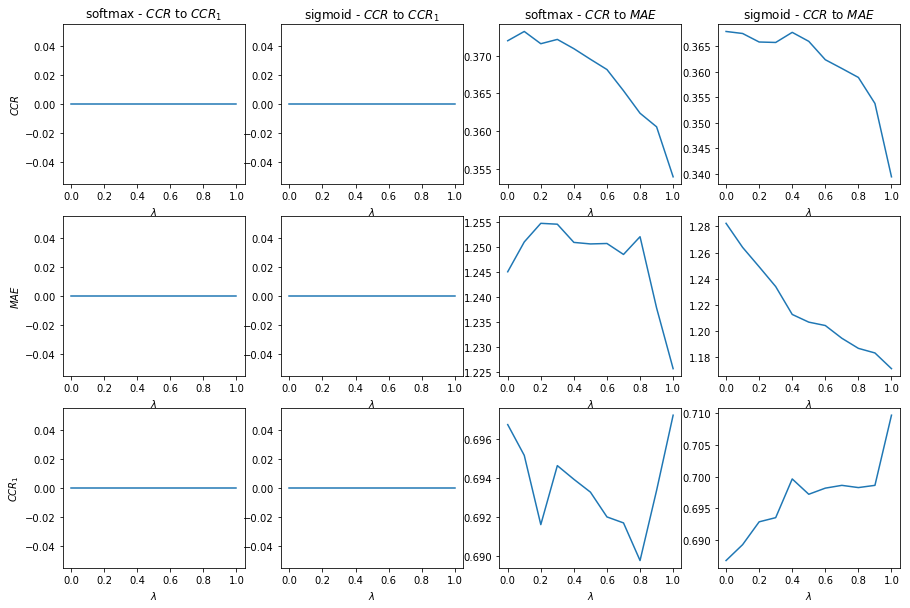

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
lmbdas = [0.1*k for k in range(11)]
plt.subplot(3,4,1)
plt.plot(lmbdas, ccr[:,0])
plt.xlabel('$\lambda$')
plt.ylabel('$CCR$')
plt.title('softmax - $CCR$ to $CCR_1$')
plt.subplot(3,4,2)
plt.plot(lmbdas, ccr[:,2])
plt.xlabel('$\lambda$')
plt.title('sigmoid - $CCR$ to $CCR_1$')
plt.subplot(3,4,3)
plt.plot(lmbdas, ccr[:,1])
plt.xlabel('$\lambda$')
plt.title('softmax - $CCR$ to $MAE$')
plt.subplot(3,4,4)
plt.plot(lmbdas, ccr[:,3])
plt.xlabel('$\lambda$')
plt.title('sigmoid - $CCR$ to $MAE$')


plt.subplot(3,4,5)
plt.plot(lmbdas, -mae[:,0])
plt.xlabel('$\lambda$')
plt.ylabel('$MAE$')
plt.subplot(3,4,6)
plt.plot(lmbdas, -mae[:,2])
plt.xlabel('$\lambda$')
plt.subplot(3,4,7)
plt.plot(lmbdas, -mae[:,1])
plt.xlabel('$\lambda$')
plt.subplot(3,4,8)
plt.plot(lmbdas, -mae[:,3])
plt.xlabel('$\lambda$')

plt.subplot(3,4,9)
plt.plot(lmbdas, ccr1[:,0])
plt.xlabel('$\lambda$')
plt.ylabel('$CCR_1$')
plt.subplot(3,4,10)
plt.plot(lmbdas, ccr1[:,2])
plt.xlabel('$\lambda$')
plt.subplot(3,4,11)
plt.plot(lmbdas, ccr1[:,1])
plt.xlabel('$\lambda$')
plt.subplot(3,4,12)
plt.plot(lmbdas, ccr1[:,3])
plt.xlabel('$\lambda$')

In [36]:
from IPython.display import display, HTML

dfs_test_mean_by_data = dfs_test_NN_mean.groupby(['data'])

for data, group in dfs_test_mean_by_data:
    display(group)
    #display(group.style.apply(highlight_max))
    


ccr_test_last  \
data                 algorithm loss coeff coeff_lambda lr_init                  
boston_housing (H10) None      ML   CCR   0.0          1             0.405941   
                                    CCR1  0.1          1             0.423762   
                                          0.2          1             0.443564   
                                          0.3          1             0.447525   
                                          0.4          1             0.453465   
                                          0.5          1             0.469307   
                                          0.6          1             0.469307   
                                          0.7          1             0.479208   
                                          0.8          1             0.447525   
                                          0.9          1             0.443564   
                                          1.0          1             0.396040   
                                    MAE   1.0          1             0.384158   
                               SL   CCR   0.0          1             0.423762   
                                    CCR1  0.1          1             0.437624   
                                          0.2          1             0.421782   
                                          0.3          1             0.427723   
                                          0.4          1             0.457426   
                                          0.5          1             0.447525   
                                          0.6          1             0.447525   
                                          0.7          1             0.473267   
                                          0.8          1             0.447525   
                                          0.9          1             0.439604   
                                          1.0          1             0.451485   
                                    MAE   1.0          1             0.348515   

                                                                rmse_test_last  \
data                 algorithm loss coeff coeff_lambda lr_init                   
boston_housing (H10) None      ML   CCR   0.0          1             -1.423836   
                                    CCR1  0.1          1             -1.362496   
                                          0.2          1             -1.345696   
                                          0.3          1             -1.304478   
                                          0.4          1             -1.301959   
                                          0.5          1             -1.251289   
                                          0.6          1             -1.228840   
                                          0.7          1             -1.206243   
                                          0.8          1             -1.221167   
                                          0.9          1             -1.224435   
                                          1.0          1             -1.222751   
                                    MAE   1.0          1             -1.236302   
                               SL   CCR   0.0          1             -1.385983   
                                    CCR1  0.1          1             -1.404705   
                                          0.2          1             -1.334055   
                                          0.3          1             -1.365267   
                                          0.4          1             -1.273460   
                                          0.5          1             -1.327220   
                                          0.6          1             -1.344911   
                                          0.7          1             -1.306908   
                                          0.8          1             -1.302432   
                                          0.9          1             -1

ccr_test_last  \
data                algorithm loss coeff coeff_lambda lr_init                  
call_housing (CH10) None      ML   CCR   0.0          1             0.416764   
                                   CCR1  0.1          1             0.416473   
                                         0.2          1             0.416764   
                                         0.3          1             0.414244   
                                         0.4          1             0.417006   
                                         0.5          1             0.417587   
                                         0.6          1             0.418508   
                                         0.7          1             0.415891   
                                         0.8          1             0.406928   
                                         0.9          1             0.398304   
                                         1.0          1             0.318411   
                                   MAE   0.1          1             0.408624   
                                         0.2          1             0.404797   
                                         0.3          1             0.404603   
                                         0.4          1             0.406153   
                                         0.5          1             0.407025   
                                         0.6          1             0.405233   
                                         0.7          1             0.402374   
                                         0.8          1             0.396657   
                                         0.9          1             0.394961   
                                         1.0          1             0.385901   
                              SL   CCR   0.0          1             0.414890   
                                   CCR1  0.1          1             0.419525   
                                         0.2          1             0.417054   
                                         0.3          1             0.415795   
                                         0.4          1             0.413517   
                                         0.5          1             0.412452   
                                         0.6          1             0.407607   
                                         0.7          1             0.403973   
                                         0.8          1             0.398692   
                                         0.9          1             0.380426   
                                         1.0          1             0.361192   
                                   MAE   0.1          1             0.404118   
                                         0.2          1             0.392345   
                                         0.3          1             0.381541   
                                         0.4          1             0.377859   
                                         0.5          1             0.373110   
                                         0.6          1             0.371076   
                                         0.7          1             0.371560   
                                         0.8          1             0.368217   
                                         0.9          1             0.367587   
                                         1.0          1             0.357752   

                                                               rmse_test_last  \
data                algorithm loss coeff coeff_lambda lr_init                   
call_housing (CH10) None      ML   CCR   0.0          1             -1.526176   
                                   CCR1  0.1          1             -1.508223   
                                         0.2          1             -1.500562   
                                         0.3          1             -1.483014   
                                         0.4          1 

ccr_test_last  \
data                         algorithm loss coeff coeff_lambda lr_init                  
cpu_act (computer10' - CC10) None      ML   CCR   0.0          1             0.533211   
                                            CCR1  0.1          1             0.533578   
                                                  0.2          1             0.538339   
                                                  0.3          1             0.539560   
                                                  0.4          1             0.535897   
                                                  0.5          1             0.533578   
                                                  0.6          1             0.524176   
                                                  0.7          1             0.525641   
                                                  0.8          1             0.484615   
                                                  0.9          1             0.428571   
                                                  1.0          1             0.344689   
                                            MAE   1.0          1             0.491453   
                                       SL   CCR   0.0          1             0.537851   
                                            CCR1  0.1          1             0.537363   
                                                  0.2          1             0.537241   
                                                  0.3          1             0.540049   
                                                  0.4          1             0.536630   
                                                  0.5          1             0.535531   
                                                  0.6          1             0.534066   
                                                  0.7          1             0.531502   
                                                  0.8          1             0.524298   
                                                  0.9          1             0.519292   
                                                  1.0          1             0.481197   
                                            MAE   1.0          1             0.499512   

                                                                        rmse_test_last  \
data                         algorithm loss coeff coeff_lambda lr_init                   
cpu_act (computer10' - CC10) None      ML   CCR   0.0          1             -1.025499   
                                            CCR1  0.1          1             -1.017216   
                                                  0.2          1             -1.005474   
                                                  0.3          1             -1.002595   
                                                  0.4          1             -0.990642   
                                                  0.5          1             -0.979016   
                                                  0.6          1             -0.996210   
                                                  0.7          1             -0.977301   
                                                  0.8          1             -1.040633   
                                                  0.9          1             -1.344455   
                                                  1.0          1             -1.396190   
                                            MAE   1.0          1             -0.995323   
                                       SL   CCR   0.0          1             -1.010117   
                                            CCR1  0.1          1             -1.002980   
                                                  0.2          1             -0.991935   
                                                  0.3          1             -0.985108   
                                                  0.4          1             -0.982914   
                                               

ccr_test_last  \
data                          algorithm loss coeff coeff_lambda lr_init                  
house_16h (census10' - CEE10) None      ML   CCR   0.0          1             0.365057   
                                             CCR1  0.1          1             0.370852   
                                                   0.2          1             0.370413   
                                                   0.3          1             0.368218   
                                                   0.4          1             0.364881   
                                                   0.5          1             0.359526   
                                                   0.6          1             0.355136   
                                                   0.7          1             0.345347   
                                                   0.8          1             0.325417   
                                                   0.9          1             0.294996   
                                                   1.0          1             0.251361   
                                             MAE   0.1          1             0.367779   
                                                   0.2          1             0.366242   
                                                   0.3          1             0.364442   
                                                   0.4          1             0.368876   
                                                   0.5          1             0.367471   
                                                   0.6          1             0.365452   
                                                   0.7          1             0.365628   
                                                   0.8          1             0.360272   
                                                   0.9          1             0.351580   
                                                   1.0          1             0.339991   
                                        SL   CCR   0.0          1             0.371159   
                                             CCR1  0.1          1             0.371905   
                                                   0.2          1             0.375505   
                                                   0.3          1             0.371335   
                                                   0.4          1             0.369096   
                                                   0.5          1             0.364574   
                                                   0.6          1             0.356146   
                                                   0.7          1             0.343152   
                                                   0.8          1             0.327349   
                                                   0.9          1             0.304565   
                                                   1.0          1             0.286567   
                                             MAE   0.1          1             0.370852   
                                                   0.2          1             0.366023   
                                                   0.3          1             0.361106   
                                                   0.4          1             0.355575   
                                                   0.5          1             0.349122   
                                                   0.6          1             0.347059   
                                                   0.7          1             0.346444   
                                                   0.8          1             0.338104   
                                                   0.9          1             0.337796   
                                                   1.0          1             0.318349   

                                                                         rmse_test_last  \
data                 

In [12]:


dfs_test_mean_by_data = dfs_test_NN_mean.groupby(['data'])

for data, group in dfs_test_mean_by_data:
    display(group.style.apply(highlight_max))
    
